# Fossil Fuel Equity Finder
Note: Instructions on how to download and install Anaconda, scipy, and fuzzywuzzy will be included in the README.md file in the project directory.

The goal of this Jupyter notebook is to provide a centralized, front end document where the user of the tool can run the analysis, explore aggregate level data, and see various visualizations.

## Instructions
This tool will provide you benchmark indicators on how many fossil fuel investments are embedded in your institution's investment portfolio.

### Tool Scope
This tool can assess dollars invested in fossil fuel extraction companies and allocate carbon reserves via a fair share analysis. This tool only works with the data you give it, for example, if you give it individual equity posisions, the tool will only assess fossil fuel equity within your individual equity portfolio. If you give it carbon reserve data, like from Fossil Free Indexes' Carbon Undergound 200, then the tool will only allocate carbon reserves to their respective investments, not the operational emissions of the companies.


### Getting Started
The following code cell containts a few import statements that will load in the packages for displaying tables and data visualizations in the notebook. It also contains a few general commands to the notebook on how to format these tables and visualizations. Go ahead and run it now. 

In [1]:
# this code cell will print out sample dataframe tables so the user can know what the csv files should look like
# with a focus on displaying proper column headers
# numpy and pandas are fundamental data processing libraries for Python
import numpy as np
import pandas as pd

# this line tells the notebook to display all numbers with 2 floating decimal places and commas separating thousands
pd.options.display.float_format = '{:,.2f}'.format

# matplotlib is a data visualization library for Python
import matplotlib.pyplot as plt

# these lines tell the notebook to show you the visualizations within the notebook using the "Seaborn" style
# https://seaborn.pydata.org/
%matplotlib inline
plt.style.use('seaborn-notebook')
plt.rcParams['figure.figsize'] = [12, 6]

# this line will let the notebook show you images
from IPython.display import Image

### The Benchmark Object
Now we're going to create a "Benchmark" Python object, which will be responsible for interfacing between us and the data. In order to do so successfully, you need to edit the below code cell to include __all__ of the years you want to analyze. For example, if you have all three required data files for 2014-2017, you will edit the below `years` variable to equal `["2014", "2015", "2016", "2017"]`. Please note that the formatting of the list in brackets on the right side of the `=` next to `years` is very important:
* Each year must be in YYYY format
* Each year must be enclosed between open and closed `"` 
* Each year must be separated by `,`
* Note the last year in the list is not followed by a `,`

In [2]:
# modify the years in this list to reflect the entirety of your data and run this cell to store the values
years = ["2012", "2013", "2014"] # edit this

In [3]:
# this cell creates a Benchmark object that will perform the visualizations inline
from ffequity.processors.benchmark import Benchmark
benchmark = Benchmark(years)

### Data Folders
The data folders are as follows:
* `carbon_data` is the folder where you'll be cleaning and saving your carbon reserve data that you acquire
* `equity_data` is the folder where you'll be cleaning and saving your equity positions data that you acquire
* `financial_data` is the folder where you'll be gathering market capitalization data for the carbon companies that are listed

### Data Cleaning and Data Standards
You will be cleaning and inserting data into these folders according to the following standards.

__IMPORTANT NOTE__: When you are formatting your data values within each sheet, make sure that there are no spaces at the end of company or stock names, as sneaky spaces at the end of a data value will break the tool!!!

#### carbon_data
For .csv files stored in the `carbon_data` folder, please format them with four columns titled and data typed as follows:
* __Company(Company)__ containing data with letters and numbers representing the names of fossil fuel companies
* __Coal(GtCO2)__ containing data with with numbers only representing the estimated carbon emissions associated with fossil fuel companies' listed coal reserves in gigatons
* __Oil(GtCO2)__ containing data with numbers only representing the estimated carbon emissions associated with fossil fuel companies' listed oil reserves in gigatons
* __Gas(GtCO2)__ containing data with numbers only representing the estimated carbon emissions associated with fossil fuel companies' listed natural gas reserves in gigatons

Please keep each year's worth of carbon data in a separate .csv file and name them according to the following naming convention:
* `YYYYFilename.csv`
* Note: The only requirement for carbon_data filenames is to lead each name with a four digit prefix representing the year that the data file examines, not the year you acquired the data.

In [4]:
# run this cell to have Benchmark show you how to format your carbon data files
# ignore the running numbers on the far left, the first column should be in your first column
benchmark.show_sample_tables("Carbon")

,Company(Company),Coal(GtCO2),Oil(GtCO2),Gas(GtCO2)
0,Best Coal,10.00,0.00,0.00
1,Some Gas,0.00,5.00,2.50
2,More Oil,0.00,10.00,2.50
3,Better Coal,20.00,0.00,0.00
4,Decent Coal,5.00,0.00,0.00


#### equity_data
For .csv files stored in the `equity_data` folder, please format them with two columns titled and data typed as follows:
* __Stocks__ containing data with letters and numbers representing the names of individual companies you are invested in
* __EndingMarketValue__ containing data with with numbers only representing the USD value of all shares held in each individual company

Please keep each year's worth of equity data in a separate .csv file and name them according to the following naming convention:
* `YYYYFilename.csv`
* Note: The only requirement for equity_data filenames is to lead each name with a four digit prefix representing the year that the data file examines, not the year you acquired the data.

In [5]:
# run this cell to have Benchmark show you how to format your carbon data files
benchmark.show_sample_tables("Equity")

,Stocks,EndingMarketValue
0,SM GAS CLASS A,"54,987,651.00"
1,MORE OIL,"13,654,977.00"
2,DCT COAL OPTIONS,"546,879,852.00"
3,BST COAL,"1,124,568.00"
4,CLOTHES R US,"1,549,865.00"


#### financial_data
__IMPORTANT__: This step will take the most time to perform in the entire tool because it requires manual data entry. Unfortunately, there currently does not exist an open-source platform that will provide historical or present-day market capitlization values for domestic and international equity. If you are aware of such a free service, particularly if it is in an API format, please email me so I can integrate it into the tool and make this step much easier!

For .csv files stored in the `financial_data` folder, please format them with two columns titled and data typed as follows:
* __Company__ containing data with letters and numbers representing the names of fossil fuel companies. __These company names should exactly match the Company(Company) data values in your carbon_data files!__
* __MarketCap(B)__ containing data with with numbers only representing the market capitalization value of each company in billions of USD. If the company is valued in the millions or trillions, please convert to billions for this field.

Please keep each year's worth of equity data in a separate .csv file and name them according to the following naming convention:
* `YYYYFilename.csv`
* Note: The only requirement for financial_data filenames is to lead each name with a four digit prefix representing the year that the data file examines, not the year you acquired the data.

In [6]:
# this cell outputs a sample table showing how column names and values should be formatted in financial_data
benchmark.show_sample_tables("Financial")

,Company,MarketCap(B)
0,Best Coal,25.80
1,Some Gas,50.20
2,More Oil,44.30
3,Better Coal,10.00
4,Decent Coal,0.50


### Finding Market Cap Values Online
You will need to do your own research on market capitalization values. You can go to multiple websites to try and find the present day market cap value of your companies. This tool was built with the understanding that you may not have 3 hours to find all of the market cap values for your target fossil fuel companies. This tool will only match and assess fossil fuel equity for each company that has a Market Cap value in `financial_data` for a given year. 

For example, if you only had time to find market cap values for 10 of your target carbon companies, then the tool will only look for matches within those 10. All of the tables and visualiztions will be generated as long as you have equity in at least one of those 10 companies. If the tool does not find a match, it will not output any results.

This means that the more financial data you manually enter, the more accurate the output of the tool will be.

I've included images of where to find market capitalization values below:

#### Yahoo Finance - Market Cap Circled In Red
<img src="img/yahoofinancebp.png" alt="Drawing" style="width: 750px;"/>

#### Google Finance - Market Cap Highlighted
<img src="img/googlefinancechevron.png" alt="Drawing" style="width: 750px;"/>

## Tool Checklist
### Did you do these things before running the next cell?
1. Make sure all of your data is in properly formatted csv files with correct file names for:
    * `equity_data`
    * `carbon_data`
    * `financial_data`
2. Make you have a data file in all three folders __for each year__ you want to assess 
3. Make sure you have the latest version of Python and installed all of the third party libraries
    * fuzzywuzzy
    * mpld3
4. Make sure your computer isn't running too many other applications that might take away from the memory performance of the tool

### Great, let's run the analysis!
The below code cell will perform the analysis. It will generate statements below itself notifying you of the status of the tool and should take around 10 seconds for each year of data you have provided.

If there are any missing data pieces or errors in formatting, this cell should print out the corresponding error statement.

As with any Python program, if there is an error that has not been accounted for, and you see a weird Error output with no instruction, I highly recommend saving your data in another place, deleting the entire tool from your computer, and redownloading a fresh version from the github website. Turning it off and on again works wonders.

In [7]:
# run this code cell to begin matching and assessing fossil fuel investments!
%run ./ffequity/ffequity.py

Folders Validated
All files validated within equity_data
All files validated within carbon_data
All files validated within financial_data
Files validated
All data validated within equity_data
All data validated within carbon_data
All data validated within financial_data
Data validated
The years of data being matched and analyzed are: {'2013', '2014', '2012'}
2013 complete...
2014 complete...
2012 complete...
In 2013, fossil fuel stocks comprised 2.66% of your individual equity portfolio.
In 2014, fossil fuel stocks comprised 3.18% of your individual equity portfolio.
In 2012, fossil fuel stocks comprised 2.84% of your individual equity portfolio.
Congratulations, the tool has completed the analysis!


Ok, what just happened. This tool performed a fair-share analysis. The steps are highlighted below:
1. The tool matched company names to the associated stocks.
2. The tool performed the following equation to assign a fair-share portion of the company's carbon reserves to the investment in the company.

$$ IC_c = I_c * (C_c / M_c) $$

3. The tool merged all of these values from the three different data sources into one output data file
4. The tool repeated this for each year specified

## Fossil Fuel Equity Summary Tables
### Aggregate dollars and carbon by year
Hooray! You have succesfully run the analysis! You can look at the output of the analysis by going to data->benchmark and opening the corresponding .csv files.

Now we can start to look at the results in this notebook. First, we are going to run the below code cell to tell Benchmark to read in the results of our analysis and tell us the names and quantity of fossil fuel companies we are invested in for each year of data we provided.

In [8]:
# this code cell reads in the output of ffequit.py and prints the number and names of invested fossil fuel companies
data = benchmark.get_tables()
benchmark.company_names()

2012
You owned investments in 7 fossil fuel companies:
CONSOL Energy, Coal India, SunCoke Energy, ENI, ConocoPhillips, Cloud Peak Energy, Royal Dutch Shell

2013
You owned investments in 6 fossil fuel companies:
CONSOL Energy, Coal India, Foresight Energy, ENI, ConocoPhillips, Royal Dutch Shell

2014
You owned investments in 7 fossil fuel companies:
CONSOL Energy, Coal India, Foresight Energy, BP, ENI, ConocoPhillips, Royal Dutch Shell



Great! Now that we have a sense of how many fossil fuel companies we are invested in, let's see how much money we've put into these companies, and by extension, how much fossil fuel reserves we're invested in. Run the below cell to have Benchmark show us aggregate investments and held reserves by fuel type for each year of data we provided.

In [9]:
# this code cell aggregates equity and reserves by fuel type by year
aggregateTable = benchmark.aggregate_table()
aggregateTable

,Fossil Fuel Equity,Total Individual Equity,Coal Equity,Oil Equity,Gas Equity,Coal Reserves (tCO2),Oil Reserves (tCO2),Gas Reserves (tCO2),Total Reserves (tCO2)
Year,,,,,,,,,
2012,"74,142,802.00",2607380240,"27,185,509.00","25,802,252.83","21,155,040.17","12,583,695.19","576,474.14","404,355.15","13,564,524.47"
2013,"69,930,824.00",2626738693,"22,034,387.00","26,318,296.83","21,578,140.17","9,040,457.94","588,003.59","412,442.23","10,040,903.77"
2014,"84,950,971.00",2667326914,"21,747,938.00","37,923,096.67","25,279,936.33","7,631,766.58","890,669.62","510,517.16","9,032,953.36"


### Top company level dollars and carbon by year
Nice work! We can ask Benchmark to dive a little deeper and look at these investments and reserve holdings on a company by company basis. In order to do so, we need to tell Benchmark what exactly we're looking for and how much of it we want to see. The below code cell contains two variables that you can edit.

`chosen` will be the metric you are interested in. It will tell Benchmark how to sort the companies. You can sort companies by:
* `"EMV"` - the dollar value of the investment in the company
* `"COAL"` - the carbon dioxide emissions embedded in your fair-share of the company's coal reserves
* `"OIL"` - the carbon dioxide emissions embedded in your fair-share of the company's coal reserves
* `"GAS"` - the carbon dioxide emissions embedded in your fair-share of the company's coal reserves

Go ahead and change `chosen` to any of these four options. Remember to use all capital letters and to keep your selection enclosed in `""`.

`numberOfRows` will be the number of companies you want to limit Benchmark showing you. It can be any whole number, but defaults to 5.

In [10]:
# you may edit these two variables as per the instructions above, or leave them as they are
chosen = "COAL" # edit this
numberOfRows = 5 # edit this

In [11]:
# run this code cell to examine investments at a company leve
benchmark.show_top(rows=numberOfRows, sort=chosen)

Top 5 sorted by Coal(tCO2) for 2012


,Company,Coal(tCO2),Oil(tCO2),Gas(tCO2),EndingMarketValue
2,SunCoke Energy,"6,573,636.25",0.00,0.00,"5,258,909.00"
0,CONSOL Energy,"5,383,362.16",0.00,0.00,"9,959,220.00"
5,Cloud Peak Energy,"457,843.57",0.00,0.00,"4,959,972.00"
1,Coal India,"168,853.20",0.00,0.00,"7,007,408.00"
3,ENI,0.00,"50,622.01","50,622.01","3,594,163.00"


Top 5 sorted by Coal(tCO2) for 2013


,Company,Coal(tCO2),Oil(tCO2),Gas(tCO2),EndingMarketValue
2,Foresight Energy,"4,728,427.00",0.00,0.00,"4,728,427.00"
0,CONSOL Energy,"4,118,271.89",0.00,0.00,"10,158,404.00"
1,Coal India,"193,759.05",0.00,0.00,"7,147,556.00"
3,ENI,0.00,"51,634.45","51,634.45","3,666,046.00"
4,ConocoPhillips,0.00,"351,122.72","175,561.36","14,220,470.00"


Top 5 sorted by Coal(tCO2) for 2014


,Company,Coal(tCO2),Oil(tCO2),Gas(tCO2),EndingMarketValue
2,Foresight Energy,"4,666,957.00",0.00,0.00,"4,666,957.00"
0,CONSOL Energy,"2,709,822.70",0.00,0.00,"10,026,344.00"
1,Coal India,"254,986.88",0.00,0.00,"7,054,637.00"
3,BP,0.00,"310,310.10","103,436.70","15,929,252.00"
4,ENI,0.00,"50,963.20","50,963.20","3,618,387.00"


## Visualizations
Now that we've looked at the numbers, let's make some charts! You may zoom in and out of this notebook like you would any webpage, in case you'd like to make it larger. You may also save any of these output charts as image files by right clicking on the chart.

### Total Dollars Invested in Fossil Fuel Companies
Run the below code cell to tell Benchmark to show us the total amount of dollars invested in fossil fuel companies by year in the form of a bar chart.

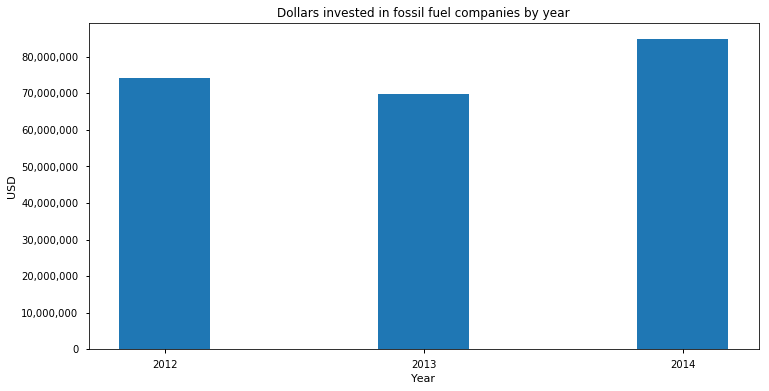

In [12]:
# run this cell to see the total amount of investments in fossil fuel companies
benchmark.plot_fossil_fuel_equity()

### Total Dollars Invested by Fuel Type
Run the below code cell to tell Benchmark to show us the previous bar chart, but segemented by fuel type. For example, the `Coal` color represents the amount of dollars invested in coal companies only.

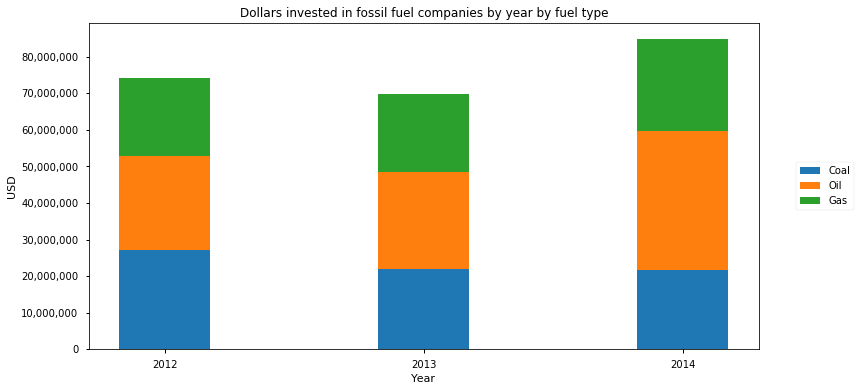

In [13]:
benchmark.plot_fossil_fuel_equity_fuel_types()

### Total Held Carbon Reserves
Run the below cell to tell Benchmark to show us the emissions embedded in our fair-share of the carbon reserves for the fossil fuel companies we are invested in.

For comparison, 1,000,000 tonnes of CO2 is equal to the emissions of electricity usage in 100,000 United States households for one year and the amount of carbon absorbed by 800,000 acres of pine trees in one year.

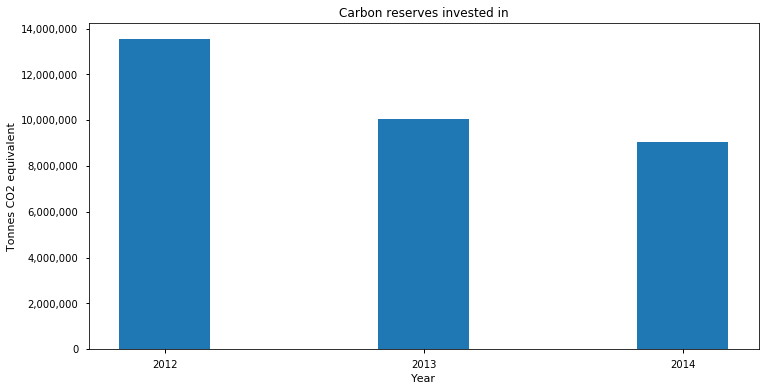

In [14]:
benchmark.plot_reserves()

### Total Held Carbon Reserves by Fuel Type
Run the below cell to tell Benchmark to show us the emissions embedded in our fair-share of the carbon reserves for the fossil fuel companeis we are invested in, broken out by fuel type.

Do you note any differences in the distribution of emissions by fuel type compared to the distribution of invested dollars in the earlier table? You might see `Coal` comprising a larger breakdown of the carbon reserves than it's share of invested dollars; this is because coal is a much dirtier energy source than oil or natural gas.

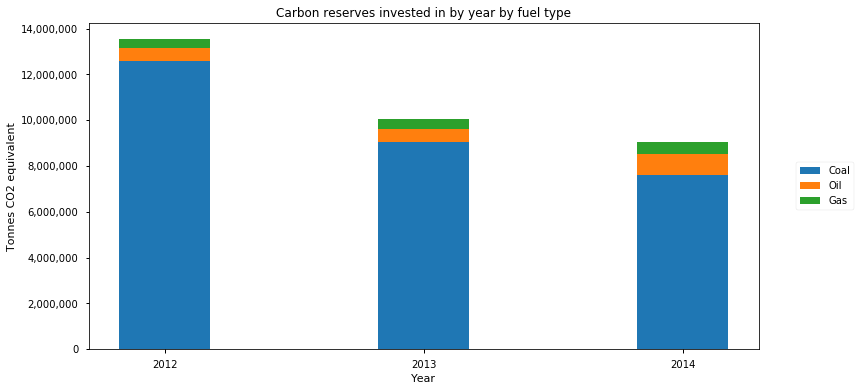

In [15]:
benchmark.plot_reserves_fuel_type()

### Scatterplot of All Invested Fossil Fuel Companies
Now we can have Benchmark show us all the invested fossil fuel companies for a specific year of data __on the same chart!__ First, let's pick a year. Edit the below variable `focusYear` to be a year of the data we have provided.

In [16]:
# modify focusYear to select one of the years of data and run this cell
focusYear = "2012" # edit this

Next, we can run the below code cell to tell Benchmark to plot all fossil fuel companies on a scatterplot with the dollars we have invested in them on the x-axis, and the associated fair-share of carbon reserves on the y-axis. Benchmark will create an interactive scatterplot, courtsey of the `mpld3` library!

By hovering the mouse over each individual point, the name of the company will be displayed.

If you hover the mouse over the scatterplot, you can see three icons appear in the lower left.

If you click on the magnifying glass: click and hold the mouse and drag a rectangle over a set of data points you'd like to observe closer. The scatterplot will zoom in on that area! Click on the magnifying glass to deselect the function.

If you click on the graph icon: click and hold the mouse to drag and move the plot window around. Click on the graph icon to  deselect the function.

If you click on the home icon, it will return to the entire scatterplot as originally generated.

In [17]:
# run this code cell to generate an interactive scatterplot
benchmark.scatterplot(focusYear)

## Interpreting the Scatterplot
In the above scatterplot, you will see all of the fossil fuel companies you are invested in that the tool found plotted against the number of dollars you've invested in each and the amount of carbon reserves that was allocated via the fair share analysis.

When evaluating the impact of your investments, you can start by looking at the four quadrants of the scatterplot. The upper-left quadrant of the scatterplot contains companies that have high carbon reserves and low dollar investments. These are prime candidates for divestment since their impact on climate change is high per dollar and you can achieve great reductions here.

The upper-right quadrant of the scatterplot contains companies that have high carbon reserves and high dollar investments. These are also good candidates for divestment, however, since you invested a lot of money in them, it may be administratively intensive to succesfully move funds out of these accounts.

The lower-right quadrant of the scatterplot contains companies that have lower carbon reserves and high dollar investments. These are companies that may be exposed to the highest transition risk, or the risk that the value of these investments will decrease as the global economy transitions to renewable energy and policy mechanisms limit the extraction and distribution of fossil fuels. While the carbon reserves are not as high as other companies, you may want to consider divesting from this quadrant to reduce your exposure to transition risk.

The lower-left quadrant of the scatterplot contains companies that have lower carbon reserves and low dollar investments. These may be too small to worry about now, you should focus on other higher-impact options.

# You're finished!
You've completed the Fossil Fuel Equity Finder notebook! Congratulations! Hopefully you've gained some insight into how your institution is investing. Feel free to create your own version of this tool, play around with inserting different sources of carbon data, add more years of data, and see how the results change. You can even add data with your future projections or estimates of reducing fossil fuel investments and see how it impacts the visualizations!

For more resources on Jupyter Notebook functionality visit their documentation: http://jupyter-notebook.readthedocs.io/en/stable/notebook.html